<a href="https://colab.research.google.com/github/mroopram/GL-NLP-Student-Template---Final-Project-Voicebot-July-2023/blob/main/GL_NLP_Student_Template_Final_Project_Voicebot_July_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

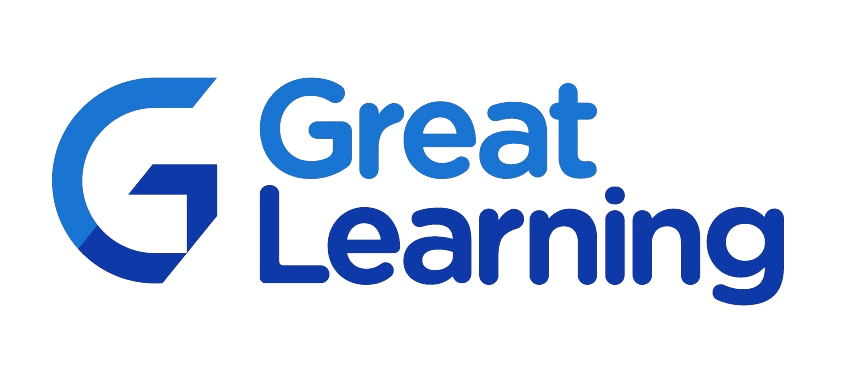

# **Voicebot with Neural Intent Identification**

------------------------------------------------------------------------------------

## **Problem Statement and Objective**
-----------------------------------------------------------------------------------------
In this project, we are going to build our own Conversational AI Framework where we will target only the Natural Language Understanding aspect of these conversations. We will be aiming to identify intents from the user's message and give a suitable reply based on that message in a one-to-one mapping. Each intent will have a pre-defined set of responses, which will be sent as outputs of the bot. The objective is to build a Neural Network model that identifies intents with high accuracies.

You can assume that this framework is being built for a Pizza Ordering FAQ Chatbot present on the business website of a Pizza restaurant. The questions and answers catered to by this bot will be in the nature of such a business.



## **0. Dataset and Intents (25 marks)**


The dataset file is named 'intents_pizza.json'. However, this is not a dataset of conversations, but rather a file that contains intents, patterns and responses. Although the file has been pre-filled with a few intents and questions that would be typical of such a chatbot, you are required to further populate the json file with further intents and questions that you would like to include in your chatbot.

## **1. Importing the Necessary Libraries**

In [ ]:
from abc import ABCMeta, abstractmethod

import random
import json
import pickle
import numpy as np
import os

# Setting the environment variable to suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Importing NLTK library and WordNet lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, SimpleRNN, SpatialDropout1D
from tensorflow.keras.optimizers import SGD

# Importing function to load a saved Keras model
from tensorflow.keras.models import load_model

# Downloading necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

True

## **2. Initializing the Lemmatizer**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lemmatizer = WordNetLemmatizer()
intents = json.loads(open('/content/drive/MyDrive/Colab Notebooks/intents_pizza v6.json').read())
print(intents)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is anyone there', 'Hello', 'Good day', 'Whats up', 'Hey', 'greetings', 'Hi', 'How are you', 'Is

The second line of code loads a JSON file called intents_pizza.json and parses its contents into a Python object using the json module.

The intents_pizza.json file contains a collection of intents and their associated responses, which will be used to build the chatbot.

## **3. Creating the Training Data from the Intents Dataset**

In [ ]:
words = []
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.'] # The ignore letters is a list of characters that won't be tokenized. You can populate this further with characters you want to ignore.

In [ ]:
for intent in intents['intents']:             # Iterate over each intent in the intents object
    for pattern in intent['patterns']:        # Iterate over each pattern (i.e., example sentence) associated with the current intent

       word_list = nltk.word_tokenize(pattern)
       words.extend(word_list)                # The array words acts as the Vocabulary
       documents.append((word_list, intent['tag'])) # The array documents contain the training data in the ['text', 'intent'] format
       if intent['tag'] not in classes:
          classes.append(intent['tag'])      # The array classes contain all the output classes.

print(documents)
len(documents)

[(['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Whats', 'up'], 'greeting'), (['Hey'], 'greeting'), (['greetings'], 'greeting'), (['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Whats', 'up'], 'greeting'), (['Hey'], 'greeting'), (['greetings'], 'greeting'), (['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Whats', 'up'], 'greeting'), (['Hey'], 'greeting'), (['greetings'], 'greeting'), (['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Whats', 'up'], 'greeting'), (['Hey'], 'greeting'), (['greetings'], 'greeting'), (['Hi'], 'greeting'), (['How', 'are', 'you'

5629

In [ ]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))

In [ ]:
len(words)

189

In [ ]:
classes = sorted(list(set(classes)))
print(classes)

['Account Problem', 'Additional_cost', 'App', 'Catering', 'Change Order', 'Delivery Locations', 'Delivery Problem', 'Delivery Question', 'Discount', 'Manager', 'Nutrition Information', 'Operating Hours', 'Pizza Choice', 'Pizza Cost', 'Pizza Order', 'Pizza Problem', 'Pizza Type', 'Popular Favorites', 'Refund', 'Reservations', 'Restaurant Locations', 'Status', 'Thank you', 'Toppings', 'Vegetarian, Gluten Free, Vegan', 'Website', 'goodbye', 'greeting']


In [ ]:
training = []
output_empty = [0] * len(classes)

for document in documents:
   bag = []
   word_patterns = document[0]
   word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
   for word in words:
     bag.append(1) if word in word_patterns else bag.append(0)

   output_row = list(output_empty)
   output_row[classes.index(document[1])] = 1
   training.append([bag, output_row])

In [ ]:
random.shuffle(training)
training = np.array(training)
train_x = list(training[:, 0])
train_y = list(training[:, 1])

<ipython-input-10-0c435169b608>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [ ]:
len(train_y[0])

28

## **4. Model Building**

In this part of the project, you will need to build the model to take in the user text as input and classify it as one of the existing intents present in the intents_pizza.json file. Since this is a classification task, the output layer should have as many neurons as **len(train_y[0])**.

You may choose any type of neural layers or any composite units while building the model. You can also choose to use a pre-trained model which you need to fine-tune based on the current classification data present in the intents_pizza.json.

### **4.1 Build and compile a simple model with fewer parameters and check the training accuracy (10 marks)**

In [ ]:
# Define the neural network architecture
model = Sequential()

model.add(Embedding(189, 50, input_length = len(words)))

model.add(SimpleRNN(50,return_sequences=True))
model.add(SimpleRNN(28, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(28, activation = 'sigmoid'))

# Define the optimizer and compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 189, 50)           9450      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 189, 50)           5050      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 28)                2212      
                                                                 
 dense_1 (Dense)             (None, 28)                812       
                                                                 
Total params: 17,524
Trainable params: 17,524
Non-trainable params: 0
_________________________________________________________________
None


### **4.2 Train your model (15 marks)**

In [ ]:
# Train the model with the training data

# specifying the batch size
batch_size = 40

# fitting the model on the training data with 20 epochs
fit = model.fit(train_x, train_y, epochs = 20, batch_size = batch_size, verbose = 'auto')

Epoch 1/20
141/141 [==============================] - 95s 633ms/step - loss: 2.9822 - accuracy: 0.1823
Epoch 2/20
141/141 [==============================] - 86s 613ms/step - loss: 2.1599 - accuracy: 0.4363
Epoch 3/20
141/141 [==============================] - 86s 607ms/step - loss: 1.6029 - accuracy: 0.5799
Epoch 4/20
141/141 [==============================] - 90s 639ms/step - loss: 1.2806 - accuracy: 0.6573
Epoch 5/20
141/141 [==============================] - 92s 650ms/step - loss: 1.0653 - accuracy: 0.7255
Epoch 6/20
141/141 [==============================] - 83s 587ms/step - loss: 0.7847 - accuracy: 0.8094
Epoch 7/20
141/141 [==============================] - 88s 622ms/step - loss: 0.6909 - accuracy: 0.8364
Epoch 8/20
141/141 [==============================] - 94s 666ms/step - loss: 0.5877 - accuracy: 0.8648
Epoch 9/20
141/141 [==============================] - 85s 605ms/step - loss: 0.4769 - accuracy: 0.8858
Epoch 10/20
141/141 [==============================] - 87s 616ms/step - l

In [ ]:
# Save the model as a pickle file
with open("/content/drive/MyDrive/Colab Notebooks/model.pkl", "wb") as f:
 pickle.dump(model, f)

In [ ]:
# Load pickle file
with open("/content/drive/MyDrive/Colab Notebooks/model.pkl", "rb") as f:
 model = pickle.load(f)

### **Observations:**
After training over 20 epochs the simple model has an excellent accuracy score of 0.9673

## **5. Preprocessing of User Text**

The following functions will clean and preprocess the user-provided text, before feeding it into the Text Classification pipeline.

In [ ]:
def clean_up_sentence(sentence):
  sentence_words = nltk.word_tokenize(sentence)
  sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
  return sentence_words

The **clean_up_sentence()** function cleans up a sentence by tokenizing it into a list of words and then lemmatizing and lowercasing each word.

In [ ]:
def bag_of_words(sentence, words):
  sentence_words = clean_up_sentence(sentence)
  bag = [0] * len(words)
  for s in sentence_words:
    for i, word in enumerate(words):
       if word == s:
          bag[i] = 1
  return np.array(bag)

def predict_class(sentence):
    p = bag_of_words(sentence, words)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.1
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
      return_list.append({'intent': classes[r[0]], 'probability': str(r[1])})
    return return_list

**bag_of_words(sentence, words)** - This function takes a sentence and a list of words as input, and returns a Bag-of-Words vector for the sentence. It first uses the *clean_up_sentence()* function to tokenize and clean up the sentence, and then creates a vector of zeros with the same length as the words list. For each word in the cleaned-up sentence, it checks if the word is in the words list, and if so, sets the corresponding element in the bag-of-words vector to 1. The function then returns *the Bag-of-Words vector as a Numpy array*.

**predict_class(sentence)** - This function takes a sentence as input, and returns a list of predicted intents and their probabilities. It first creates a Bag-of-Words vector for the sentence using the *bag_of_words()* function. It then uses the trained Neural Network model (model) to predict the output probabilities for each class. *The ERROR_THRESHOLD variable is used to filter out low-probability classes*, and the remaining classes are sorted in descending order of probability. The function then creates a list of dictionaries, where each dictionary contains the predicted intent and its probability. The list is sorted in descending order of probability, and then returned.

In [ ]:
def get_response(intents_list, intents_json):
    try:
        tag = intents_list[0]['intent']            # This line gets the predicted intent tag from the first element of the intents_list
        list_of_intents = intents_json['intents']
        for i in list_of_intents:
            if i['tag']  == tag:
               result = random.choice(i['responses'])
               break
    except IndexError:
        result = "I don't understand!"      # This line assigns a default response to the result variable if no intent was predicted
    return result

This function allows you to retrieve a response for a predicted intent by looking up the corresponding intent in the intents_pizza.json file and randomly choosing a response from the responses list. If no intent was predicted, a default response is returned.

## **6. Testing our Chatbot**

After getting the response from the chatbot, get that response read by a Text-to-Speech (TTS) model of your choice, to create the Voicebot.

Modern Text-to-Speech models use Deep Learning techniques to generate synthetic speech from text. The process involves three main steps: text processing, acoustic modeling, and waveform synthesis. In this notebook, we will be utilizing a function that abstracts out these steps and directly converts our text into machine speech.

## **7. Importing the Necessary Libraries for Text-to-Speech (TTS)**

In [ ]:
# Import necessary libraries here
!pip install gTTS

# Import any Text to Speech model - for example, Google Text-to-Speech (gTTS)
from gtts import gTTS
from io import BytesIO

# Import Audio method from IPython's Display Class
from IPython.display import Audio

import time

## **8. Implementing the TTS (20 marks)**

In [ ]:
#Testing Chatbot
message = input("")
ints = predict_class(message)
res = get_response(ints, intents)
print(res)

Can I make a reservation? 
1/1 [==============================] - 0s 44ms/step
Yes, visit pizza.reservations.com to start the process or call 1800 PIZZA 11 to speak to a hostess near you. We hope you enjoy your dining experience!


In [ ]:
# Write Code for Text to Speech here
# Provide the string to convert to speech
# Save the string converted to speech as a .mp3 file

text_to_read = res
language = 'en'
slow_audio_speed = False
filename = "my_file.mp3"

def reading_from_model():
  message = input("")
  ints = predict_class(message)
  res = get_response(ints, intents)
  model_input = res
  audio_created = gTTS(text=model_input, lang=language, slow=slow_audio_speed)
  audio_created.save(filename)
  if model_input:
    return Audio(filename, autoplay=True)

reading_from_model()

What toppings do you have
1/1 [==============================] - 0s 51ms/step


## **9. Creating a Sequential Deep Learning Model with RNNs/LSTMs/GRUs**

In [ ]:
word_to_index = {'<PAD>': 0, '<UNK>': 1}
for i, word in enumerate(words):
    word_to_index[word] = i + 2


In [ ]:
tokenized_sentences = []
for document in documents:
    tokens = []
    for word in document[0]:
        if word in word_to_index:
            tokens.append(word_to_index[word])
        else:
            tokens.append(word_to_index['<UNK>'])
    tokenized_sentences.append(tokens)
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 10
padded_sentences = pad_sequences(tokenized_sentences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
train_x = padded_sentences
len(train_y)

5629

### **9.1 Creating the Complex Architecture with Embedding layer, RNN/LSTM/GRU, and compiling your model**
### **(10 marks)**

In [ ]:
# model2 Write your code here
from tensorflow.keras.layers import SpatialDropout1D


model2 = Sequential()

model2.add(Embedding(189, 148, input_length = max_len))

model2.add(SpatialDropout1D(0.6))

model2.add(LSTM(500,activation = 'softmax', return_sequences=True))
model2.add(LSTM(500,activation = 'softmax', return_sequences=True))
model2.add(LSTM(500,activation = 'softmax', dropout = 0.6, recurrent_dropout = 0.6))

model2.add(Dense(28, activation = 'sigmoid'))


# Define the optimizer and compile the model
model2.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 148)           27972     
                                                                 
 spatial_dropout1d (SpatialD  (None, 10, 148)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 10, 500)           1298000   
                                                                 
 lstm_1 (LSTM)               (None, 10, 500)           2002000   
                                                                 
 lstm_2 (LSTM)               (None, 500)               2002000   
                                                                 
 dense_2 (Dense)             (None, 28)                14028     
                                                      

### **9.2 Training your model (15 marks)**

In [ ]:
# Write your code here
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

# specifying the batch size
batch_size = 10

# fitting the model on the training data with 35 epochs
fit2 = model2.fit(train_x, train_y, epochs = 35, batch_size = batch_size)

Epoch 1/35
563/563 [==============================] - 79s 122ms/step - loss: 3.2491 - accuracy: 0.0814
Epoch 2/35
563/563 [==============================] - 69s 122ms/step - loss: 3.1527 - accuracy: 0.0853
Epoch 3/35
563/563 [==============================] - 71s 126ms/step - loss: 3.1235 - accuracy: 0.0853
Epoch 4/35
563/563 [==============================] - 77s 136ms/step - loss: 3.1159 - accuracy: 0.0853
Epoch 5/35
563/563 [==============================] - 78s 139ms/step - loss: 3.1136 - accuracy: 0.0853
Epoch 6/35
563/563 [==============================] - 65s 116ms/step - loss: 3.1128 - accuracy: 0.0853
Epoch 7/35
563/563 [==============================] - 68s 121ms/step - loss: 3.1125 - accuracy: 0.0853
Epoch 8/35
563/563 [==============================] - 66s 117ms/step - loss: 3.1124 - accuracy: 0.0853
Epoch 9/35
563/563 [==============================] - 64s 113ms/step - loss: 3.1123 - accuracy: 0.0853
Epoch 10/35
563/563 [==============================] - 66s 117ms/step - l

In [ ]:
# Save the model as a pickle file
with open("/content/drive/MyDrive/Colab Notebooks/model2.pkl", "wb") as f:
 pickle.dump(model2, f)

In [ ]:
# Load pickle file
with open("/content/drive/MyDrive/Colab Notebooks/model2.pkl", "rb") as f:
 model2 = pickle.load(f)

## **10. Testing Model2 on our chatbot**

In [ ]:
def predict_class(sentence):
    tokenized_sentence = []
    tokens = []
    for word in sentence.split():
        if word in word_to_index:
            tokens.append(word_to_index[word])
        else:
            tokens.append(word_to_index['<UNK>'])
    tokenized_sentence.append(tokens)
    padded_sentence = pad_sequences(tokenized_sentence, maxlen=10, padding='post', truncating='post')
    res = model2.predict(padded_sentence)[0]
    ERROR_THRESHOLD = 0.1
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
      return_list.append({'intent': classes[r[0]], 'probability': str(r[1])})
    return return_list

In [ ]:
def get_response2(intents_list, intents_json):
    try:
        tag = intents_list[0]['intent']
        list_of_intents = intents_json['intents']
        for i in list_of_intents:
            if i['tag']  == tag:
               result = random.choice(i['responses'])
               break
    except IndexError:
        result = "I don't understand!"
    return result

In [ ]:
  #Testing Chatbot
  message = input("")
  ints = predict_class(message)
  res2 = get_response2(ints, intents)
  print(res2)


Can I make a reservation?
1/1 [==============================] - 0s 24ms/step
Yes we offer delivery and pick up in your area. Check pizza.location.com to find the restaurant closest to you. Our order app will also have the information you need.


In [ ]:
# Write code for Text to Speech here

text_to_read = get_response2
language = 'en'
slow_audio_speed = False
filename = "my_file.mp3"

def reading_from_model2():
  message = input("")
  ints = predict_class(message)
  res2 = get_response2(ints, intents)
  model2_input = res2
  audio_created = gTTS(text=model2_input, lang=language, slow=slow_audio_speed)
  audio_created.save(filename)
  if model2_input:
    return Audio(filename, autoplay=True)

In [ ]:
reading_from_model2()

Hello
1/1 [==============================] - 0s 22ms/step


## **11. Observations and Conclusions (5 marks)**

For the simple model I chose 2 SimpleRNN layers and a dense layer with a total of 17,524 parameters. My complex model has 3 LSTM layers, a dropout layer, and a dense layer with a total of 5,344,000 parameters.

Although my complex model is larger with more parameters my simple model received increasingly higher accuracy scores over 20 epochs. In addition, the simple model provides accurate responses to user input.

My complex model had very poor accuracy scores and did not improve over 35 epochs.

The results are likely due to the small size of the training data. The complex model may need more data to perform better in comparision to the simple model.

# **Additional Section: Real-world Ramifications**

While we have seen a simple example of how Intent Identification would be done in a prototypical chatbot, in actuality Intent Classification is a very active area of research involving large ensemble architectural models. The nuances of Natural Language means extracting intents from prompts with 99%+ accuracy is often quite a difficult proposition.

The **RASA Diet** architecture (used inside the NLU portion of the RASA Conversational AI framework) is one such example of this:


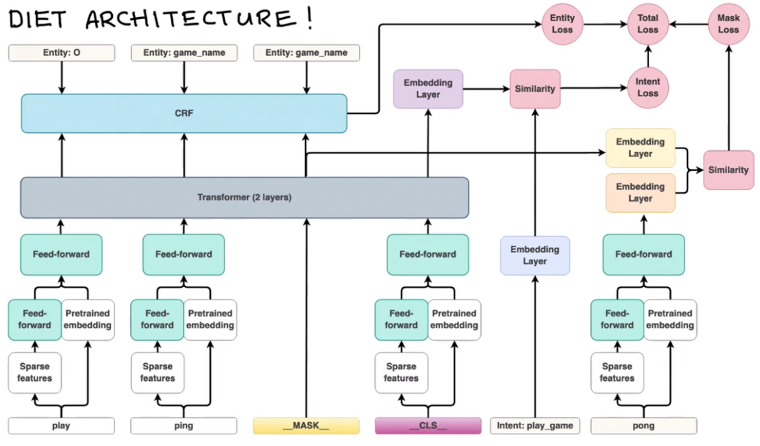

Instead of just relying on Dense Embeddings for sentences, RASA NLU tries to use Sparse / One-hot Encodings of words as part of a larger scheme of deriving the best possible embeddings for Conversational Understanding, in order to derive the intents and entities. It is a LEGO-style architecture, where one can swap out various parts of the model with other equivalent blocks.

As an example, for getting the Pretrained Embeddings, one could easily swap out Word2vec for BERT, and for the Sparse Embeddings, one could easily use TF-IDF in place of Bag-of-Words.

While such models may be too complex for all but industry-grade NLP solutions, it is worth remembering the Law of Diminishing Returns in building AI products - achieving a 10% reduction in error often requires a significant jump in complexity, and that is where the cutting-edge of the industry often functions.